In [1]:
pip install bifold

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


density/interaction               L          norm        renorm      vol2        vol4            msr
──────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────total     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_m3y_reid_zr          0          None        1.000   -59632.709  -981694.619       16.462 
───────direct    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_direct               0          None        1.000   -23321.461  -486686.172       20.869 
rho_p    : f_2prm_gaussian        0          None        1.000        4.000        8.543        2.136 
rho_t    : f_ripl                 0          None        1.000       39.970      459.660       11.500 
vnn      : f_yukawa               0          None        1.000     1570.558      588.970        0.375 
vnn      : f_yukawa               0          None

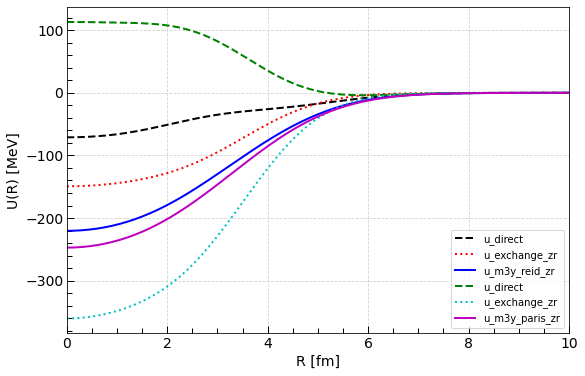

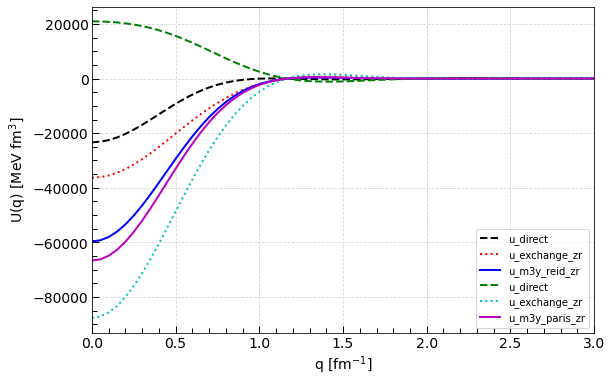

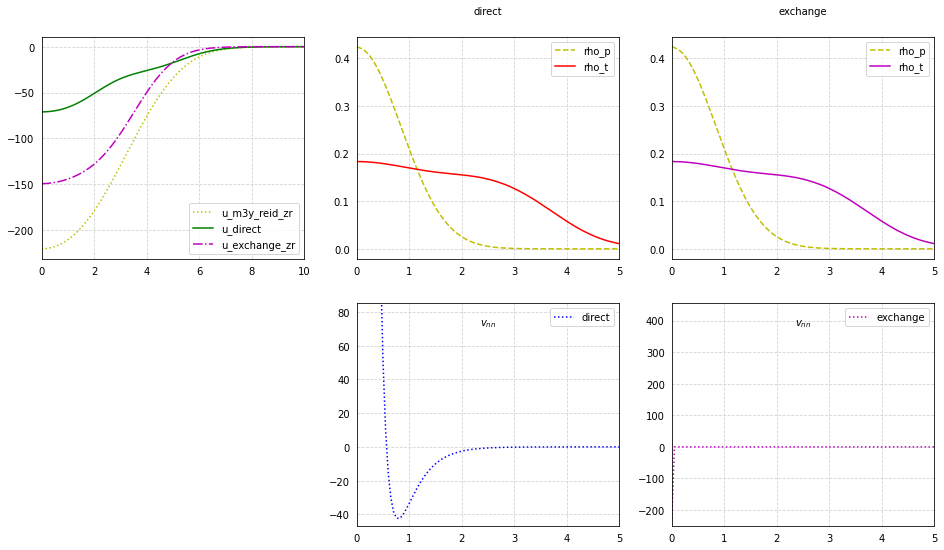

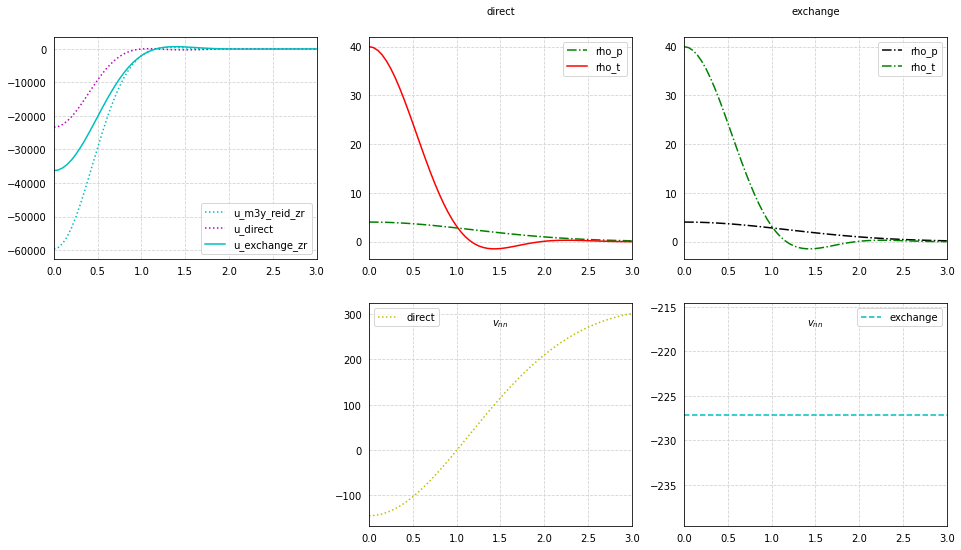

In [2]:
from bifold import *
#print_bifold_logo()

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.05)  # fm^-1
R = r.copy()  # fm
s = r.copy()

e_lab = 141.7
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
#rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)
rho_t = f_ripl(r, z_targ, a_targ)

u1 =  u_m3y_reid_zr(e_lab, a_proj, rho_p, rho_t, r, q, R, s)
u2 =  u_m3y_paris_zr(e_lab, a_proj, rho_p, rho_t, r, q, R, s)

print_all(u1, r, q)
print_all(u2, r, q, show='info')
plot_potentials([u1, u2], R, part='all', linestyles=['dashed', 'dotted', 'solid', 'dashed', 'dotted', 'solid'])
plot_fouriers([u1, u2], q, part='all', linestyles=['dashed', 'dotted', 'solid', 'dashed', 'dotted', 'solid'])
plot_all(u1, r, q)